# UTS Pembelajaran Mesin

Nama  : Raihan Adam<br>
NIM : 1197050109<br>
Kelas : Teori-B<br>
Dataset : [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)<br>
Algoritma : K-Means<br>
Alasan  : Saya melakukan analisis data set ini untuk mengetahui produktivitas seseorang berdasarkan umur yang memengaruhi pendapatan, karena struktur umur akan berpengaruh terhadap kegiatan ekonomi yang dilakukan oleh yang bersangkutan sesuai dengan kemampuannya.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('marketing_campaign.csv', header=0, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
# Menghapus/membuang kolom yang tidak diperlukan
df = df.drop(["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Kidhome", "Teenhome", "Complain", "Recency", "Dt_Customer", "Z_CostContact", "Z_Revenue", "NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"], axis=1)

In [19]:
# Menghitung data yang kosong kolom "Income"
df.Income.isnull().sum()

24

In [29]:
# Mengisi data yang kosong dengan 0
df.Income.fillna(0, inplace=True)
df.Income.isnull().sum()

0

In [21]:
# Menghitung umur dari pengurangan tahun sekarang dan tahun lahir dari beberapa data
age = datetime.datetime.now().year - df.Year_Birth
df['Age'] = age

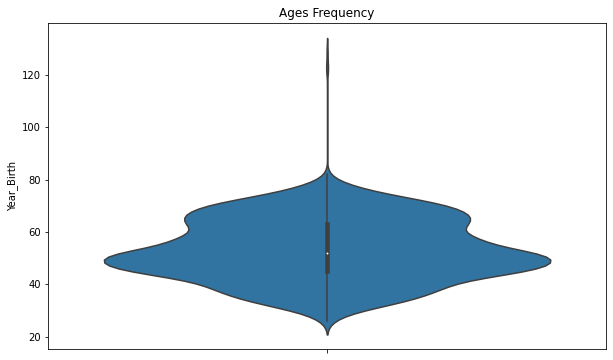

In [22]:
# Frekuensi umur
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=age)
plt.show()

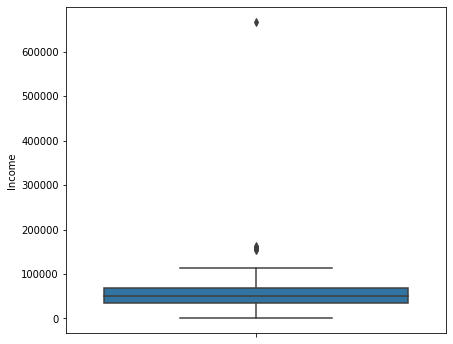

In [23]:
# Frekuensi pendapatan
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df.Income)
plt.show()

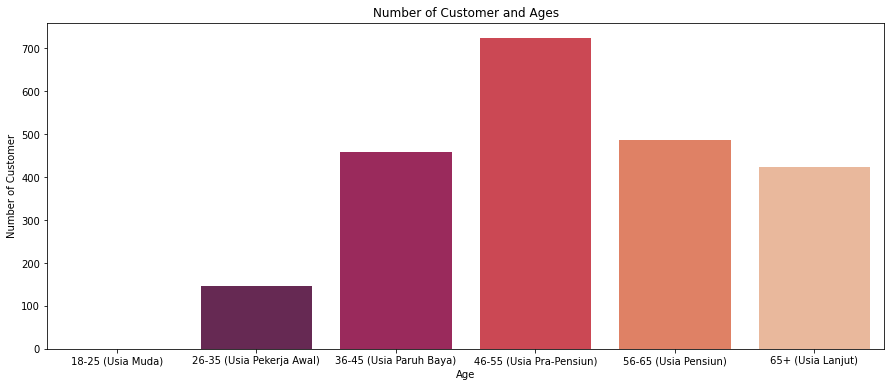

In [30]:
age18_25 = age[(age <= 25) & (age >= 18)] # Usia Muda
age26_35 = age[(age <= 35) & (age >= 26)] # Usia Pekerja Awal
age36_45 = age[(age <= 45) & (age >= 36)] # Usia Paruh Baya
age46_55 = age[(age <= 55) & (age >= 46)] # Usia Pra-Pensiun
age56_65 = age[(age <= 65) & (age >= 56)] # Usia Pensiun
age65above = age[age >= 66] # Usia Lanjut

x = ["18-25 (Usia Muda)","26-35 (Usia Pekerja Awal)","36-45 (Usia Paruh Baya)","46-55 (Usia Pra-Pensiun)","56-65 (Usia Pensiun)","65+ (Usia Lanjut)"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age65above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [25]:
# 0 = Usia Muda (18-25)
# 1 = Usia Pekerja Awal (26-35)
# 2 = Usia Paruh Baya (36-45)
# 3 = Usia Pra-Pensiun (46-55)
# 4 = Usia Pensiun (56-65)
# 5 = Usia Lanjut >65
condition = [0, 1, 2, 3, 4, 5]
choices = [(age <= 25) & (age >= 18), (age <= 35) & (age >= 26), (age <= 45) & (age >= 36), (age <= 55) & (age >= 46), (age <= 65) & (age >= 56), age >= 66]
df["AvgAges"] = np.select(choices, condition)
df

,ID,Year_Birth,Education,Marital_Status,Income,Age,AvgAges
0,5524,1957,Graduation,Single,58138.0,65,4
1,2174,1954,Graduation,Single,46344.0,68,5
2,4141,1965,Graduation,Together,71613.0,57,4
3,6182,1984,Graduation,Together,26646.0,38,2
4,5324,1981,PhD,Married,58293.0,41,2
...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,55,3
2236,4001,1946,PhD,Together,64014.0,76,5
2237,7270,1981,Graduation,Divorced,56981.0,41,2
2238,8235,1956,Master,Together,69245.0,66,5


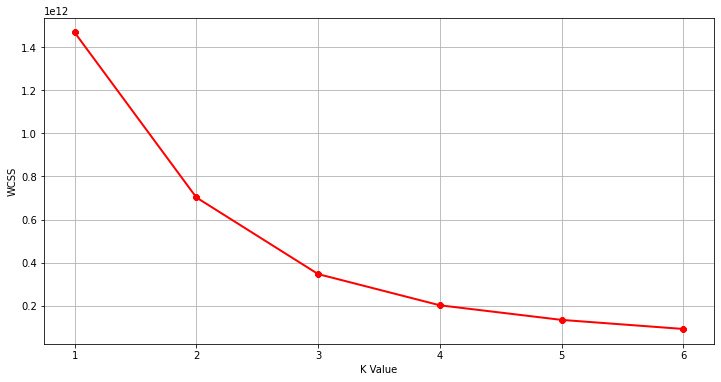

In [26]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,7):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(df.iloc[:,[4]])
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,7), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,7,1))
plt.ylabel("WCSS")
plt.show()

[[ 78459.77413479]
 [ 38751.59848485]
 [666666.        ]
 [ 58599.1882716 ]
 [ 19691.54133333]
 [158024.28571429]]


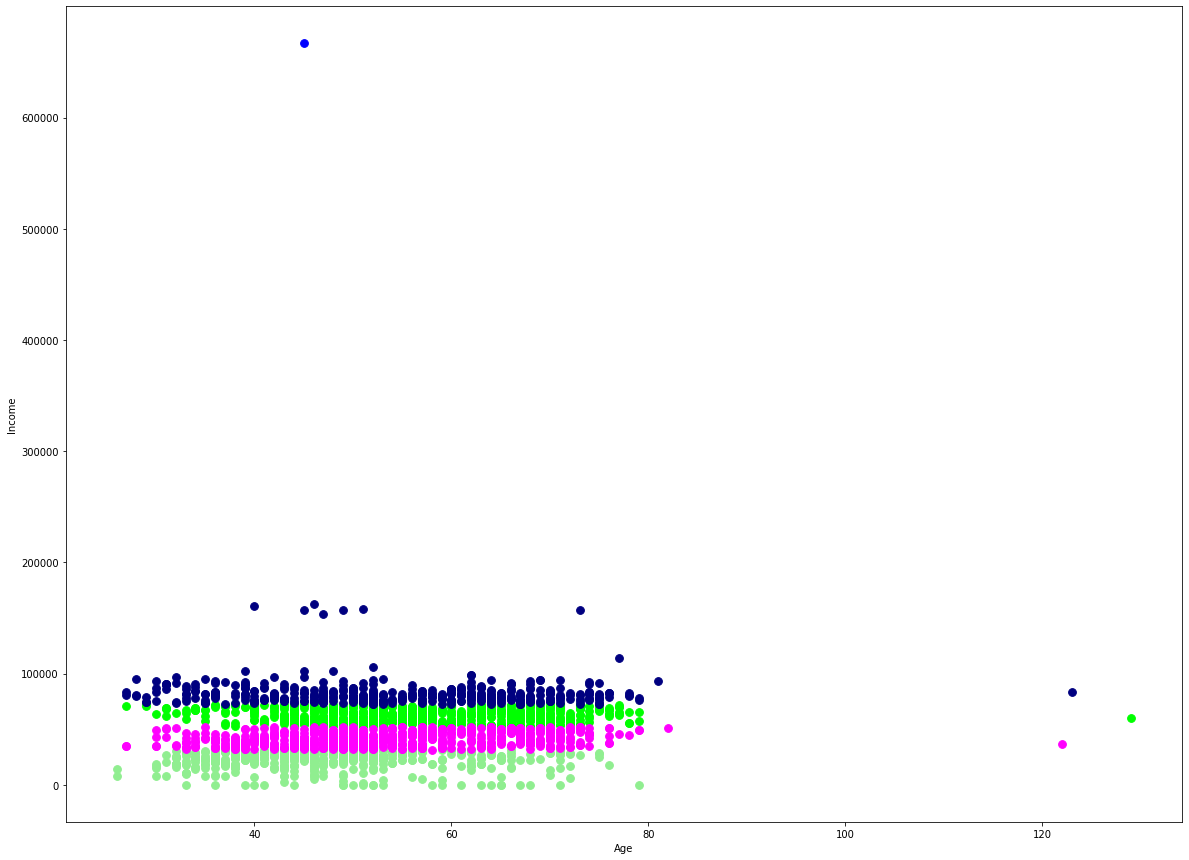

In [32]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,[4, 5]])
df["label"] = clusters
ageavg = [age18_25, age26_35, age36_45, age46_55, age56_65, age65above]
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
# ax.scatter(clusters, df.Income, c='red', s=60)
# ax.scatter(age26_35, c='red', s=60)
# ax.scatter(age36_45, c='green', s=60)
# ax.scatter(age46_55, c='orange', s=60)
# ax.scatter(age56_65, c='purple', s=60)
# ax.scatter(age65above, c='yellow', s=60)
# ax.view_init(30, 185)
ax.scatter(df.Age[df.label == 0], df.Income[df.label == 0], c='lightgreen', s=60)
ax.scatter(df.Age[df.label == 1], df.Income[df.label == 1], c='lime', s=60)
ax.scatter(df.Age[df.label == 2], df.Income[df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df.Income[df.label == 3], c='navy', s=60)
ax.scatter(df.Age[df.label == 4], df.Income[df.label == 4], c='magenta', s=60)

centers = kmeans.cluster_centers_
print(centers)
# ax.scatter(centers[:,0], centers[:,0], c='red', s=100, alpha=1)

plt.xlabel("Age")
plt.ylabel("Income")
plt.show()
